# PASSWORD STRENGTH PREDICTION

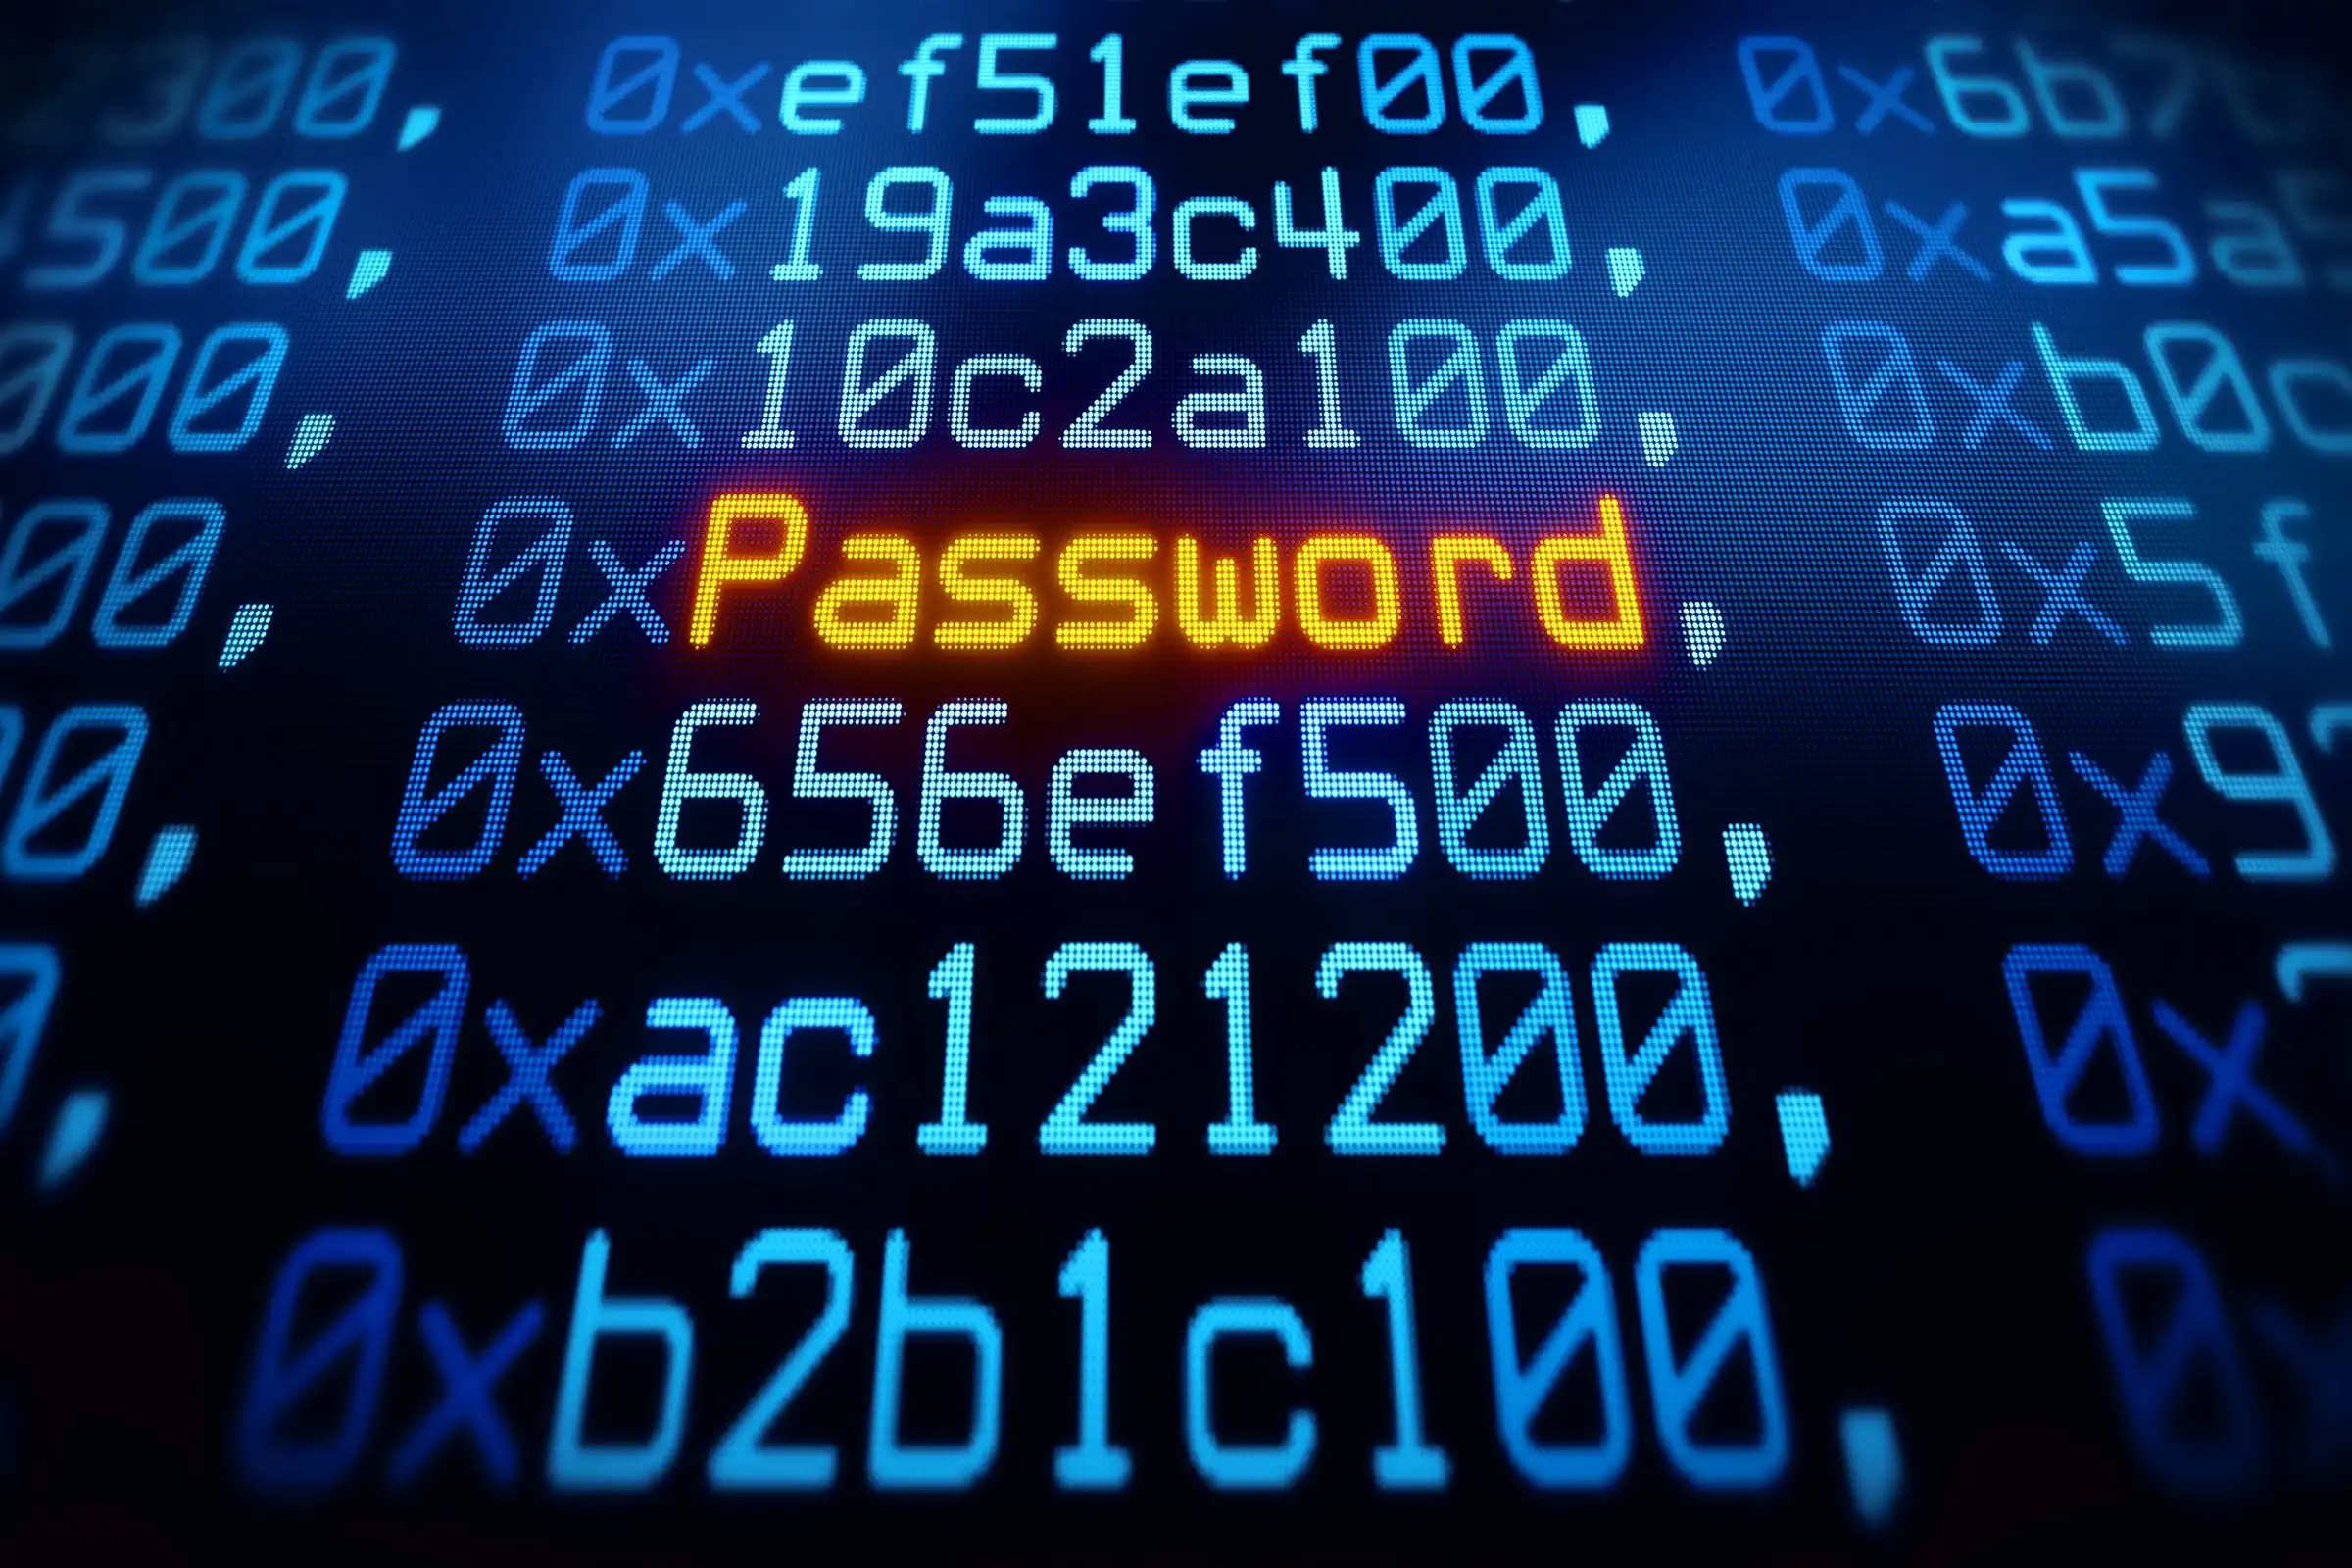

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
data= pd.read_csv('passwords.csv', error_bad_lines= False)
data.head()

b'Skipping line 2810: expected 2 fields, saw 5\nSkipping line 4641: expected 2 fields, saw 5\nSkipping line 7171: expected 2 fields, saw 5\nSkipping line 11220: expected 2 fields, saw 5\nSkipping line 13809: expected 2 fields, saw 5\nSkipping line 14132: expected 2 fields, saw 5\nSkipping line 14293: expected 2 fields, saw 5\nSkipping line 14865: expected 2 fields, saw 5\nSkipping line 17419: expected 2 fields, saw 5\nSkipping line 22801: expected 2 fields, saw 5\nSkipping line 25001: expected 2 fields, saw 5\nSkipping line 26603: expected 2 fields, saw 5\nSkipping line 26742: expected 2 fields, saw 5\nSkipping line 29702: expected 2 fields, saw 5\nSkipping line 32767: expected 2 fields, saw 5\nSkipping line 32878: expected 2 fields, saw 5\nSkipping line 35643: expected 2 fields, saw 5\nSkipping line 36550: expected 2 fields, saw 5\nSkipping line 38732: expected 2 fields, saw 5\nSkipping line 40567: expected 2 fields, saw 5\nSkipping line 40576: expected 2 fields, saw 5\nSkipping line 

,password,strength
0,kzde5577,1
1,kino3434,1
2,visi7k1yr,1
3,megzy123,1
4,lamborghin1,1


In [3]:
data['strength'].unique()

array([1, 2, 0], dtype=int64)

# There are only 3 classes in strength

## 0->Password is weak

## 1->Normal password

## 2->Strong password

In [4]:
data.isna().sum()

password    1
strength    0
dtype: int64

In [5]:
data[data['password'].isnull()]

,password,strength
367579,NaN,0


In [6]:
data.dropna(inplace= True)

In [7]:
data.isna().sum()

password    0
strength    0
dtype: int64

<AxesSubplot:xlabel='strength', ylabel='count'>

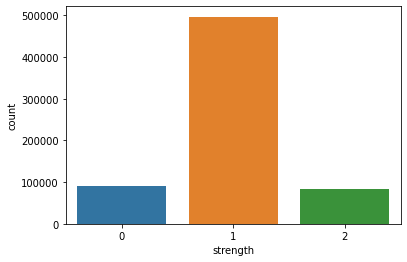

In [8]:
sns.countplot(data['strength'])

# DATA ANALYSIS

### The above data is inclined towards strength= 1, i.e. if we use this data as it is then our model will predict almost all the test results to have strength= 1 So we will do certain manipulation in this dataset

In [9]:
password_tuple= np.array(data)

In [10]:
password_tuple

array([['kzde5577', 1],
       ['kino3434', 1],
       ['visi7k1yr', 1],
       ...,
       ['184520socram', 1],
       ['marken22a', 1],
       ['fxx4pw4g', 1]], dtype=object)

# Now we will shuffle our array

In [11]:
import random
random.shuffle(password_tuple)

# Independent Data in dataset

In [12]:
x= [label[0] for label in password_tuple]
x[0:25]

['kzde5577',
 'kzde5577',
 'kzde5577',
 'kino3434',
 'kino3434',
 'lamborghin1',
 'lamborghin1',
 'kino3434',
 'visi7k1yr',
 'v1118714',
 'kino3434',
 'universe2908',
 'universe2908',
 'megzy123',
 '612035180tok',
 'as326159',
 'kzde5577',
 'AVYq1lDE4MgAZfNt',
 'lamborghin1',
 'idofo673',
 'v1118714',
 'megzy123',
 'jytifok873',
 'u6c8vhow',
 'elyass15@ajilent-ci']

# Dependent data in dataset

In [13]:
y= [labels[1] for labels in password_tuple]
y[0:25]

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2]

# Applying TF-IDF

### The data should be in character datatype

# Converting the data into character format

In [14]:
def convert_to_char(input):
    character=[]
    for i in input:
        character.append(i)
    return character

In [15]:
convert_to_char('kzde5577')

['k', 'z', 'd', 'e', '5', '5', '7', '7']

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [17]:
vectorizer= TfidfVectorizer(tokenizer=convert_to_char)

In [18]:
X=vectorizer.fit_transform(x)

In [19]:
X.shape

(669639, 130)

In [20]:
vectorizer.get_feature_names()

['\x05',
 '\x06',
 '\x08',
 '\x0f',
 '\x10',
 '\x11',
 '\x16',
 '\x17',
 '\x19',
 '\x1b',
 '\x1c',
 '\x1e',
 ' ',
 '!',
 '"',
 '#',
 '$',
 '%',
 '&',
 '(',
 ')',
 '*',
 '+',
 '-',
 '.',
 '/',
 '0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 'a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z',
 '{',
 '|',
 '}',
 '~',
 '\x7f',
 '\x81',
 '\x8d',
 '\xa0',
 '¡',
 '¤',
 '¦',
 '«',
 '°',
 '±',
 '²',
 '³',
 'µ',
 '·',
 'º',
 '¾',
 '¿',
 '×',
 'ß',
 'à',
 'á',
 'â',
 'ä',
 'å',
 'æ',
 'ç',
 'è',
 'ê',
 'í',
 'ï',
 'ð',
 'ñ',
 'ò',
 'ó',
 'ô',
 'õ',
 'ö',
 '÷',
 'ù',
 'ú',
 'û',
 'ü',
 'ý',
 'þ',
 'ÿ',
 'œ',
 '—',
 '‚',
 '‡',
 '…',
 '‹',
 '›']

# To get the data having its own importance

In [21]:
first_document_vector= X[0]

In [22]:
first_document_vector.T.todense()

matrix([[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.56734081],
        [0.        ],
        [0.59088476],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0

In [23]:
df= pd.DataFrame(first_document_vector.T.todense(), index= vectorizer.get_feature_names(), columns=['TF-IDF'])
df.sort_values('TF-IDF', ascending= False)

,TF-IDF
7,0.590885
5,0.567341
z,0.336393
k,0.292324
d,0.285489
...,...
>,0.000000
=,0.000000
<,0.000000
;,0.000000


## Creating train test split

In [24]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test= train_test_split(X, y, test_size= 0.27,random_state=42)

x_train.shape

(488836, 130)

In [25]:
x_test.shape

(180803, 130)

In [26]:
#Model
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score 

## Using Logistic Regression(multiclass)

In [27]:
clf= LogisticRegression(random_state= 0, multi_class= 'multinomial')

In [28]:
clf.fit(x_train, y_train)

LogisticRegression(multi_class='multinomial', random_state=0)

In [29]:
y_pred= clf.predict(x_test)
y_pred

array([1, 1, 1, ..., 1, 1, 1])

In [30]:
# for logistic regression multinomial
from sklearn.metrics import confusion_matrix, accuracy_score

cm= confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred))

[[  7198  16989     24]
 [  5238 125514   3490]
 [    40   6704  15606]]
0.8203293086950991


Text(69.0, 0.5, 'Truth')

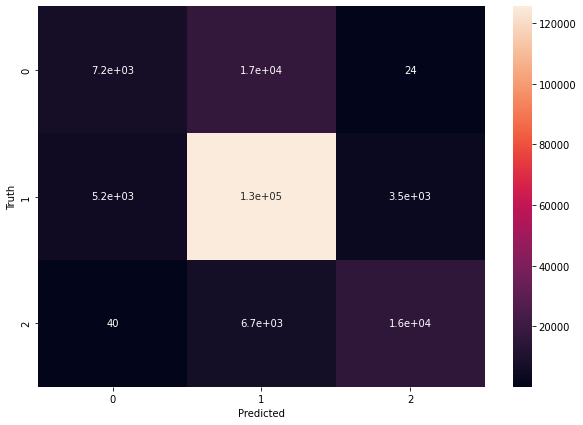

In [31]:
#let's plot confusion matrix with the help of seaborn
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

## Using Logistic Regression(ovr)

In [32]:
#ovr is one versus rest
#n_jobs= -1 means it uses all cores of the CPU
logr=LogisticRegression(multi_class='ovr',random_state=0,n_jobs=-1)
logr.fit(x_train, y_train)
y_pred= logr.predict(x_test)
print(accuracy_score(y_test, y_pred))

0.8133272124909432


## Using XG Boost

In [33]:
xgbc=xgb.XGBClassifier()
xgbc.fit(x_train, y_train)
y_pred= xgbc.predict(x_test)
print(accuracy_score(y_test, y_pred))

0.9863719075457819


## Using Multinomial Naive Bayes

In [34]:
mnb=MultinomialNB()
mnb.fit(x_train, y_train)
y_pred= mnb.predict(x_test)
print(accuracy_score(y_test, y_pred))

0.7439588944873702


In [35]:
result={'model_name':['logistic_regr_mutinomial','logistic_regr_ovr','xgboost','naive bayes'],'Accuracy':[0.819,0.811,0.985,0.741]}
result1=pd.DataFrame(result)
result1

,model_name,Accuracy
0,logistic_regr_mutinomial,0.819
1,logistic_regr_ovr,0.811
2,xgboost,0.985
3,naive bayes,0.741


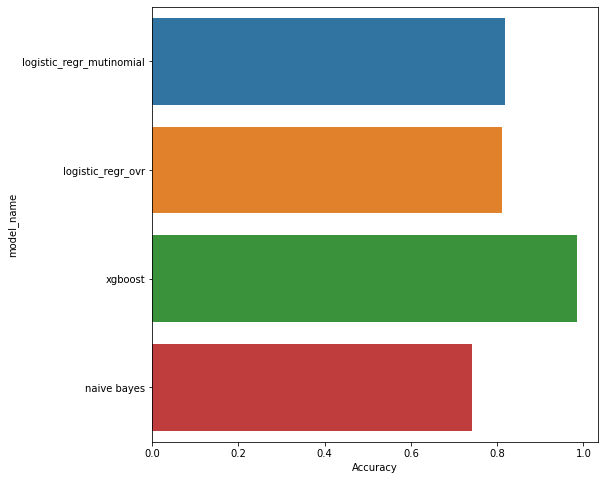

In [36]:
plt.figure(figsize=(8,8))
a=sns.barplot(result1.Accuracy,result1.model_name,data=result1)
a.set_label('accuracy')

# As we can see that XGBoost performs best for that given data

[[    41  23993    177]
 [    15 133820    407]
 [     2  21699    649]]


Text(69.0, 0.5, 'Truth')

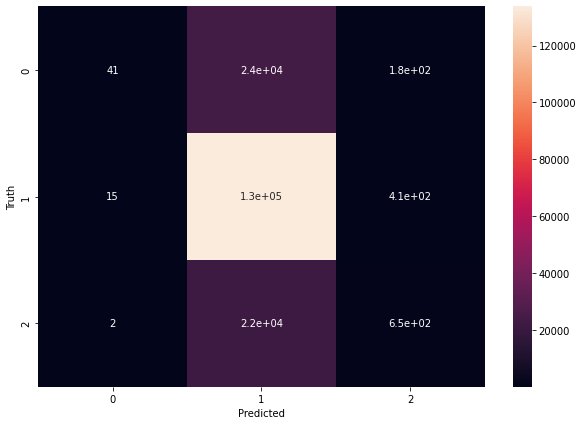

In [37]:
# Let's plot confusion matrix for XGBClassifier

cm= confusion_matrix(y_test, y_pred)
print(cm)

#Plot confusion Matrix with Seaborn
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [38]:
# Let's see the classification report for XGBClassifier

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.00      0.00     24211
           1       0.75      1.00      0.85    134242
           2       0.53      0.03      0.06     22350

    accuracy                           0.74    180803
   macro avg       0.66      0.34      0.30    180803
weighted avg       0.71      0.74      0.64    180803



In [39]:
#let's see how is it working by providing a weak pasword
passw="amitt"

In [40]:
passw=vectorizer.transform([passw])

In [41]:
xgbc.predict(passw)

array([0], dtype=int64)

## we can see it correctly classifies the password to be Weak i.e. strength=0

# Completed